<a href="https://colab.research.google.com/github/samuelfre/eday/blob/main/tce_previsao_energy_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import os
HOUSING_PATH = os.path.join("drive/MyDrive/Colab Notebooks/tce-dataset", "base")

def getData():
    #size = 31536000
    size = 107065
    #Cria a conexão com o banco de dados e cria um Pandas Dataframe com
    #alguns(size) dados da tabela Iluminação
    sqlEngine    = create_engine('', pool_recycle=3600)
    dbConnection = sqlEngine.connect()
    dataset      = pd.read_sql(f"""SELECT 
i.Horario, i.BH1750_3P_A, i.BH1750_3P_B, i.BH1750_3P_C, i.BH1750_GRT_PRIV,
i.BH1750_RESERV, i.BH1750_CRECHE, i.BH1750_PATIO_SERV, i.BH1750_S1_C_EXT,
e.Energy_Day
FROM `automacao`.`ILUMINACAO` i
JOIN `automacao`.`INVERSORES_WEG_100` e
ON i.Horario = e.Horario
WHERE
e.Energy_Day IS NOT NULL and
i.BH1750_3P_A IS NOT NULL and
i.BH1750_3P_B IS NOT NULL and
i.BH1750_3P_C IS NOT NULL and
i.BH1750_GRT_PRIV IS NOT NULL and
i.BH1750_RESERV IS NOT NULL and
i.BH1750_CRECHE IS NOT NULL and
i.BH1750_PATIO_SERV IS NOT NULL and
i.BH1750_S1_C_EXT IS NOT NULL and
e.horario between TIME("08:00:00") and TIME("18:00:00")
order by e.Horario desc
limit {size};""", dbConnection);
    pd.set_option('display.expand_frame_repr', False)
    dbConnection.close()
    return dataset
#Carrega um arquivo csv, com base em um caminho especificado pela varíavel housing_path
def load_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "frame2.csv")
    return pd.read_csv(csv_path)

In [ ]:
dataset = load_data()
dataset.drop("Unnamed: 0", axis=1, inplace=True)
dataset.drop("Horario", axis=1, inplace=True)
#dataset.drop("TEMT6000_3P_B", axis=1, inplace=True)
dataset.head()

,BH1750_3P_A,BH1750_3P_B,BH1750_3P_C,BH1750_GRT_PRIV,BH1750_RESERV,BH1750_CRECHE,BH1750_PATIO_SERV,BH1750_S1_C_EXT,Energy_Day
0,233.0,325.0,284.0,756.0,1577.0,136.0,190.0,277.0,199.82
1,233.0,325.0,284.0,756.0,1577.0,136.0,190.0,277.0,208.51
2,233.0,325.0,284.0,756.0,1577.0,136.0,190.0,277.0,200.60
3,233.0,325.0,284.0,756.0,1577.0,136.0,190.0,277.0,209.88
4,233.0,325.0,284.0,756.0,1577.0,136.0,190.0,277.0,222.54


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107065 entries, 0 to 107064
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BH1750_3P_A        107065 non-null  float64
 1   BH1750_3P_B        107065 non-null  float64
 2   BH1750_3P_C        107065 non-null  float64
 3   BH1750_GRT_PRIV    107065 non-null  float64
 4   BH1750_RESERV      107065 non-null  float64
 5   BH1750_CRECHE      107065 non-null  float64
 6   BH1750_PATIO_SERV  107065 non-null  float64
 7   BH1750_S1_C_EXT    107065 non-null  float64
 8   Energy_Day         107065 non-null  float64
dtypes: float64(9)
memory usage: 7.4 MB


In [ ]:
dataset.describe()

,BH1750_3P_A,BH1750_3P_B,BH1750_3P_C,BH1750_GRT_PRIV,BH1750_RESERV,BH1750_CRECHE,BH1750_PATIO_SERV,BH1750_S1_C_EXT,Energy_Day
count,107065.000000,107065.000000,107065.000000,107065.000000,107065.000000,107065.000000,107065.000000,107065.000000,107065.000000
mean,1041.506515,2099.038855,910.356979,2453.262924,7159.080699,1027.719049,1639.224303,2089.762714,92.465856
std,794.181061,1689.209358,634.486641,1774.625746,4660.023325,892.177813,2292.625582,1719.214195,69.677493
min,68.000000,114.000000,53.000000,104.000000,495.000000,55.000000,49.000000,135.000000,0.000000
25%,443.000000,853.000000,351.000000,850.000000,3289.000000,384.000000,354.000000,765.000000,23.960000
50%,737.000000,1502.000000,890.000000,2420.000000,5763.000000,642.000000,644.000000,1324.000000,74.000000
75%,1481.000000,2952.000000,1356.000000,3691.000000,11192.000000,1574.000000,1711.000000,3301.000000,158.060000
max,4601.000000,10876.000000,3270.000000,8972.000000,19864.000000,6023.000000,11020.000000,8810.000000,222.540000


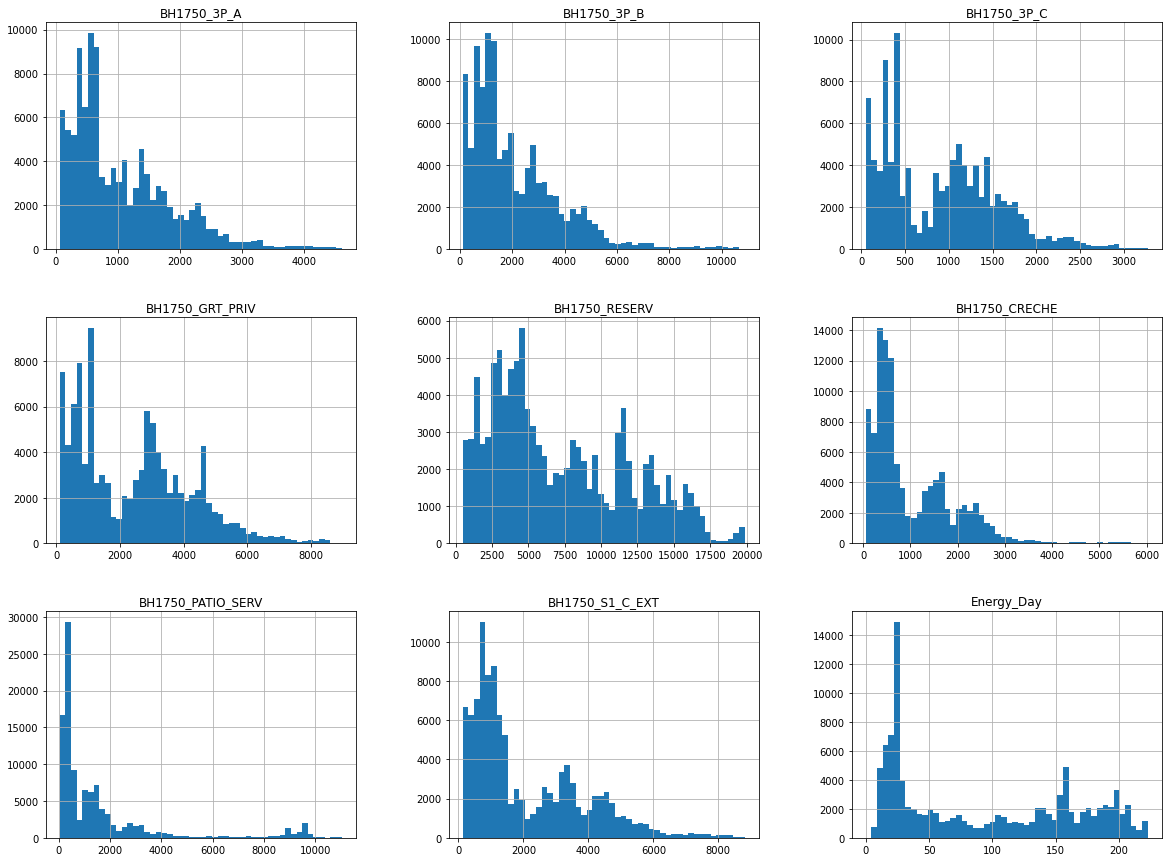

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Separação do dataset em conjunto de treino e conjunto de teste
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
#Verificando força de correlação
corr_matrix = train_set.corr()
corr_matrix["Energy_Day"].sort_values(ascending=False)

Energy_Day           1.000000
BH1750_3P_C          0.535906
BH1750_GRT_PRIV      0.526110
BH1750_PATIO_SERV    0.371980
BH1750_3P_A          0.115074
BH1750_3P_B          0.094947
BH1750_CRECHE        0.042709
BH1750_RESERV        0.032931
BH1750_S1_C_EXT     -0.003477
Name: Energy_Day, dtype: float64

In [ ]:
#Separação de Previsores e Rótulos
main_set = train_set.drop("Energy_Day", axis=1) #Previsor
label_set = train_set["Energy_Day"].copy() #Rótulo

In [ ]:
#Pipeline | Preenchimento de dados nulos - Média | Escalonamento de características - Padronização
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
X = num_pipeline.fit_transform(main_set)
main_set = pd.DataFrame(X, columns=main_set.columns, index=main_set.index)

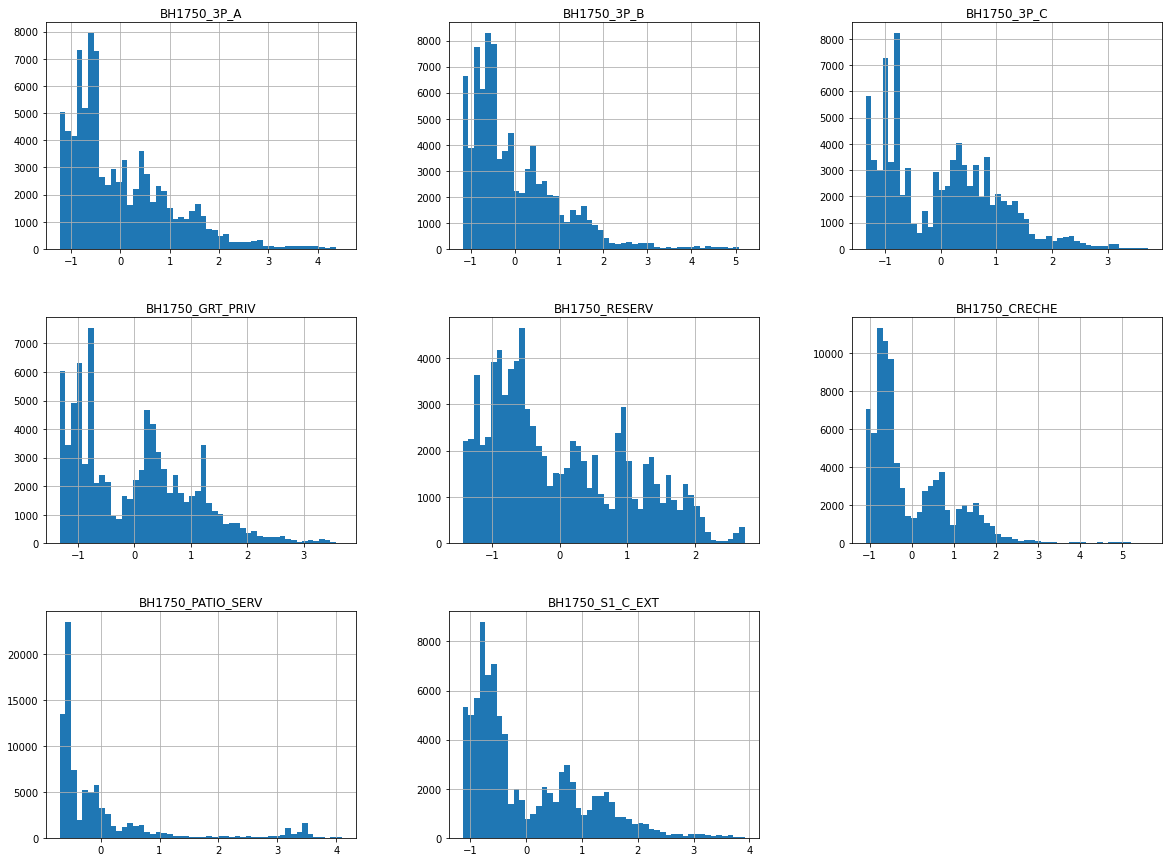

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
main_set.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Treinando modelo - Regressão Linear
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(main_set, label_set)

LinearRegression()

In [ ]:
#Teste em alguns dados do conjunto de treinamento
some_data = main_set.iloc[0:5]
some_labels = label_set.iloc[0:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [ 79.45209957  44.99411066  46.03607272 108.64464648  59.11310212]
Labels: [136.66, 25.27, 23.31, 102.42, 158.09]


In [ ]:
#Calculando o RMSE - Regressão Linear
from sklearn.metrics import mean_squared_error
import numpy as np
main_predictions = lin_reg.predict(main_set)
lin_mse = mean_squared_error(label_set, main_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:", lin_rmse)

RMSE: 42.73307822283176


In [ ]:
#Treinando modelo - Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(main_set, label_set)

DecisionTreeRegressor()

In [ ]:
#Avaliando o modelo com validação cruzada
from sklearn.model_selection import cross_val_score
#Validação cruzada - Árvore de Decisão
scores = cross_val_score(tree_reg, main_set, label_set, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standart deviation:", scores.std())

In [ ]:
#Validação cruzada - Árvore de Decisão
display_scores(tree_rmse_scores)

Scores: [6.22954178 6.14786392 6.64969845 6.48812962 6.36845141 6.60997329
 6.07197465 6.88941794 6.30987058 6.16759421]
Mean: 6.3932515846557205
Standart deviation: 0.24832231951540396


In [ ]:
#Validação cruzada - Regressão Linear
lin_scores = cross_val_score(lin_reg, main_set, label_set, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [42.35276539 42.85117938 42.74909666 42.71898581 42.59658795 42.82328148
 42.29964203 42.6632871  42.59515374 43.71130691]
Mean: 42.736128645342845
Standart deviation: 0.3680226004147432


In [ ]:
#Treinando modelo - Floresta aleatória
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(main_set, label_set)

#RMSE - Floresta aleatória
forest_mse = mean_squared_error(label_set, main_predictions)
forest_mse = np.sqrt(forest_mse)
forest_mse

#Validação cruzada - Floresta aleatória
forest_scores = cross_val_score(forest_reg, main_set, label_set, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [6.06408178 6.01885199 6.44935671 6.32915041 6.23392012 6.43762435
 5.92916845 6.7325718  6.11420722 6.01526596]
Mean: 6.232419878891143
Standart deviation: 0.23994205498216106


In [ ]:
#Teste em alguns dados do conjunto de treinamento
some_data = main_set.iloc[0:150]
some_labels = label_set.iloc[0:150]
# print("Predictions:", forest_reg.predict(some_data))
# print("Labels:", list(some_labels))

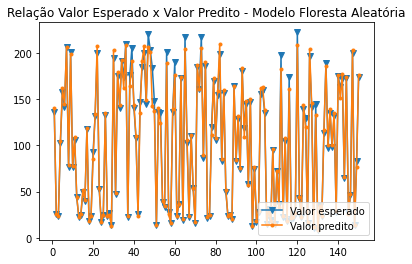

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(1,150,150)
y1 = forest_reg.predict(some_data)
y2 = list(some_labels)
plt.plot(x, y2, 'v-', label='Valor esperado')
plt.plot(x, y1, '.-', label='Valor predito')
plt.legend(loc='lower right')
plt.title("Relação Valor Esperado x Valor Predito - Modelo Floresta Aleatória")
plt.show()